In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

In [4]:
import matplotlib.pyplot as plt

In [5]:
sys.path.append("/mnt/d/Rutgers/control_transition/")

In [6]:
from plot_utils import *

In [7]:
from data_collapse import *

In [8]:
nshell=2
L=11
mu=1.1
# zz=load_torch_pt(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es50_seed0_SE.pt')
zz=load_torch_pt(f'class_A_2D_L11_nshell2_mu1.20_es50_seed0_SE.pt')

# Generate

In [116]:
L_list=range(11,21,2)
params_list=[
({'es':'50',},{'L':L_list,'nshell':[2,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2)) }),
({'es':'50',},{'L':L_list,'nshell':[3,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.3,1.8,11)]),2)) }),
({'es':'50',},{'L':L_list,'nshell':[4,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='{L} {mu:.2f} {nshell}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 80/80 [00:00<00:00, 22916.56it/s]


generate_params: 100%|██████████| 80/80 [00:00<00:00, 15967.66it/s]


# Load

In [41]:
np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2))

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.7 , 1.8 , 1.9 , 2.  , 2.1 ])

In [46]:
np.linspace(1.1,2.1,21)

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ])

In [95]:
L_list=range(11,21,2)
params_list=[
({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.linspace(1.1,2.1,21)}),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
data_0_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_dict,
        data_dict_file=None, 
    )


df_0=convert_pd(data_0_dict,names=['Metrics','L','nshell','mu','seed0'])

generate_params:   0%|          | 0/420 [00:00<?, ?it/s]

/mnt/d/Rutgers/control_transition/plot_utils.py:147: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_dict[params]=torch.tensor(observations).numpy()
generate_params: 100%|██████████| 420/420 [00:02<00:00, 169.91it/s]


# Data

## nshell 2

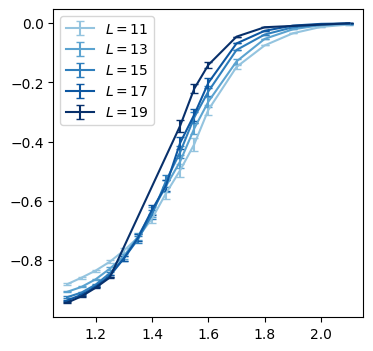

In [97]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


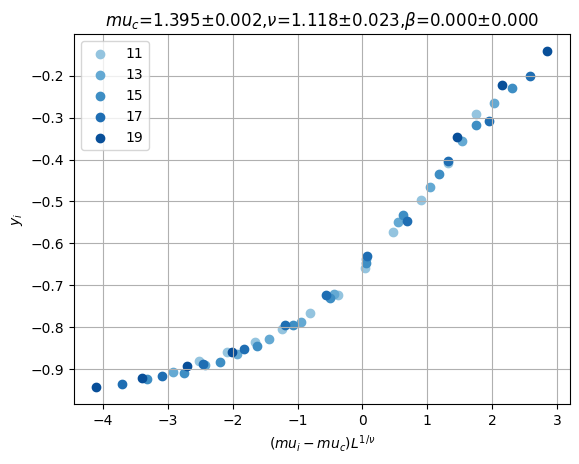

In [99]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':2},Lmin=11,Lmax=19,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

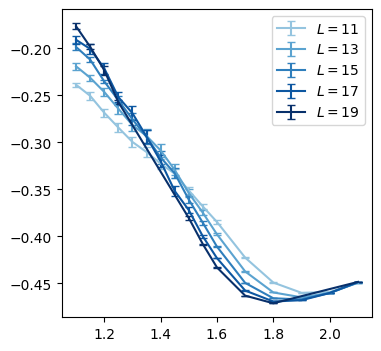

In [100]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


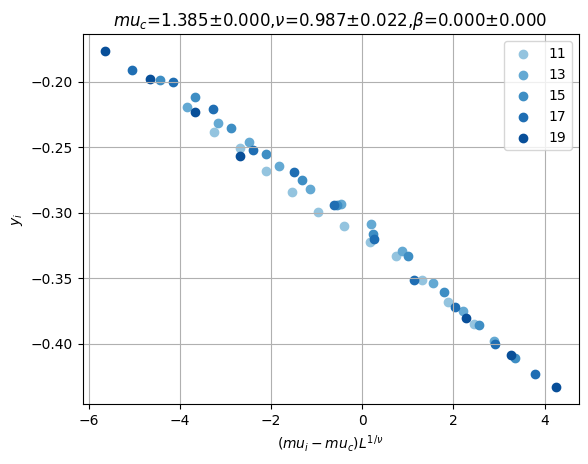

In [101]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':2},Lmin=11,Lmax=19,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

## nshell 3

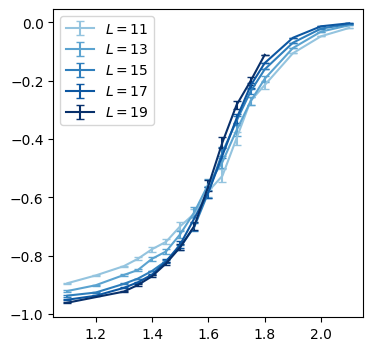

In [102]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=3
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


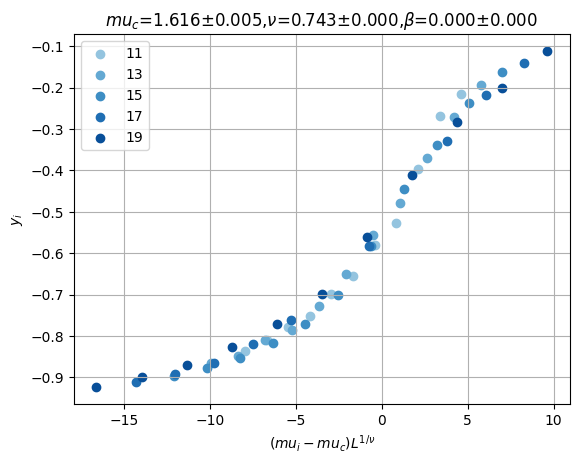

In [104]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.3,1.8],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.69,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

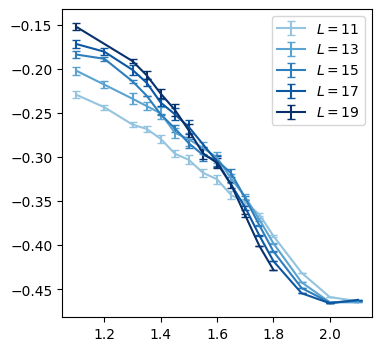

In [105]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=3
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


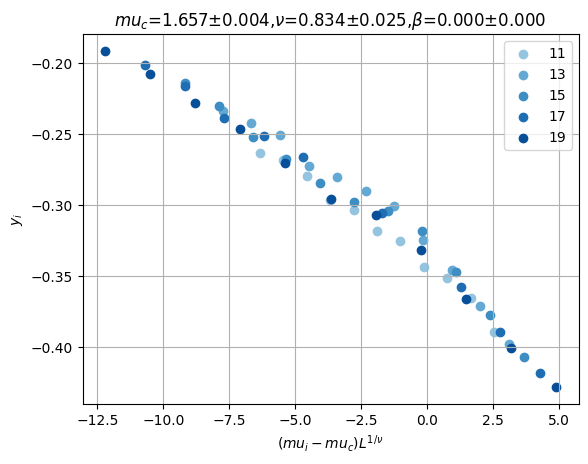

In [106]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.3,1.8],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.69,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

## nshell = 4

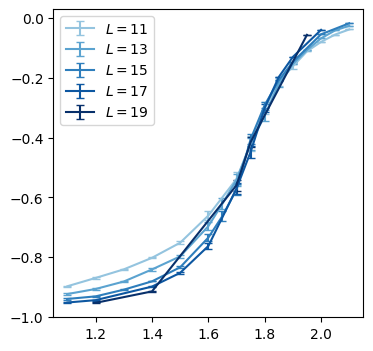

In [107]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


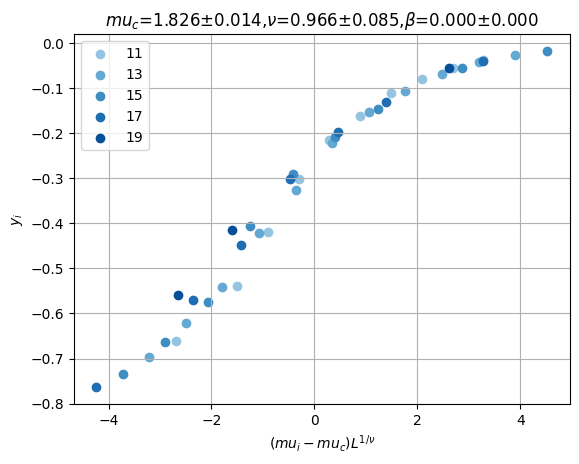

In [109]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2.1],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

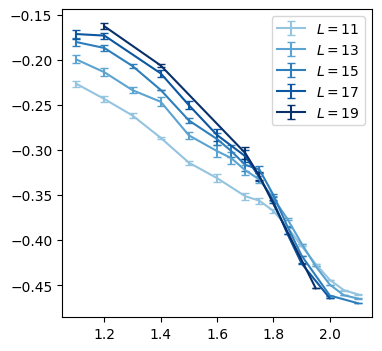

In [110]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


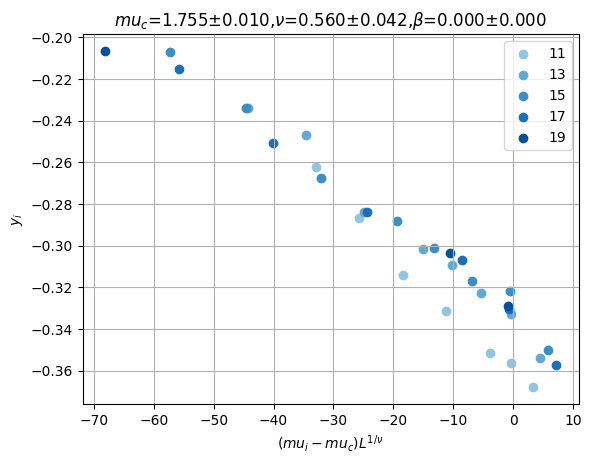

In [111]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.3,1.8],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.69,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

In [75]:
dc.datacollapse(nu=1.,p_c=1.69,p_c_range = dc.p_range,nu_range=(0.5,3))


## nshell =5

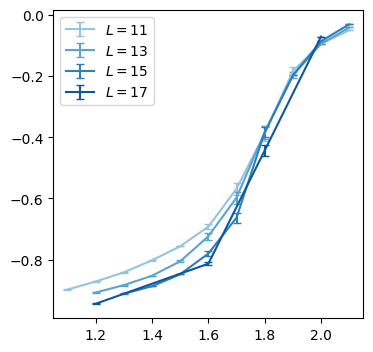

In [113]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=5
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


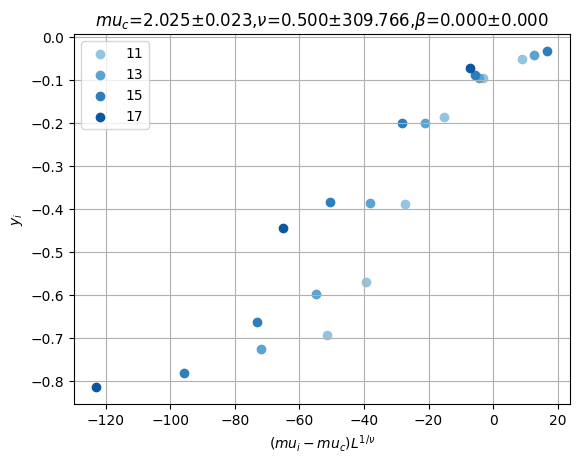

In [114]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':5},Lmin=11,Lmax=17,p_range=[1.6,2.1],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

In [ ]:
You can check what happened for "19 1.30 2", and seed = 4

[hp636@amarel2 GTN]$ cat 25.err
100%|██████████| 19/19 [03:48<00:00, 12.04s/it]
100%|██████████| 19/19 [03:49<00:00, 12.06s/it]
100%|██████████| 19/19 [03:49<00:00, 12.10s/it]
100%|██████████| 19/19 [03:49<00:00, 12.07s/it]

In [31]:
data=(df_0['observations'].xs('TMI',level='Metrics').xs(4,level='nshell').xs(11,level='L').xs(0,level='seed0').apply(np.mean))

In [33]:
data.index

Float64Index([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1], dtype='float64', name='mu')